In [2]:
import pandas as pd

In [3]:
stimulus_package = pd.read_csv("../data/India/relief measures/stimulus_package.csv")
stimulus_package.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
stimulus_package

,Text
0,The link for the SOHARD webinar https://t.co/R...
1,#IndiaFightsCorona\nAatmanirbhar stimulus pack...
2,Negative growth is being projected for our eco...
3,@narendramodi All stimulus package are well in...
4,#IndiaFightsCorona\nAatmanirbhar stimulus pack...
...,...
1120,The government needs to introduce a stimulus p...
1121,#CODVID19 #Australia #stimuluspackage #auspol ...
1122,@RinggitPlus But with this current Economy Sti...
1123,@blowupdumpling Apa yang vile?\n\nThe donation...


In [4]:
tweet_text_list = stimulus_package['Text'].tolist()

tweet_text_list

['The link for the SOHARD webinar https://t.co/Rh5NioGlHC\nMeeting ID: 847 4203 1128\nPassword: 260316\nPlease join at 11:00 AM\nTopic: Deconstructing the Economic Stimulus Package for Panchayats\nTime: Jul 4, 2020 11:00 AM\nJoin Zoom Meeting\nSocial Action For Human Resource Development',
 '#IndiaFightsCorona\nAatmanirbhar stimulus package\nvia NaMo App https://t.co/vuWUxzORYa',
 'Negative growth is being projected for our economy this year. The stimulus package announced by the BJP Govt completely failed to build any confidence among businesses &amp; agencies. #imjktomar https://t.co/Bfw1D5wXCI',
 '@narendramodi All stimulus package are well in order but execution will be on ground by human resources.I urge that all involved stake holder must know the schemes and eligibility must be declared with clear https://t.co/iyEpzMZBlx will help to catter productive growth in time.',
 '#IndiaFightsCorona\nAatmanirbhar stimulus package\nvia NaMo App https://t.co/pYePRQrh5D',
 '#IndiaFightsCoron

In [5]:
import numpy as np
import re

In [6]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "pm care", "pm cares", "pmcare", "pmcares","vaccinated","vaccination", "weekend", "lockdown", "day", "night", "amp", "pm", "am", "will"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [7]:
cleaned_tweets = [clean_tweet(tw) for tw in tweet_text_list]
cleaned_tweets

<ipython-input-6-d13fc1f1ab32>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['link sohard webinar meeting id 847 4203 1128 password 260316 please join at 11 00 topic deconstructing economic stimulus package panchayats time jul 4 2020 11 00 join zoom meeting social action human resource development',
 'aatmanirbhar stimulus package via namo app',
 'negative growth is being projected our economy this year stimulus package announced by bjp govt completely failed build any confidence among businesses agencies',
 'all stimulus package are well order but execution be ground by human resources i urge that all involved stake holder must know schemes eligibility must be declared with clear help catter productive growth time',
 'aatmanirbhar stimulus package via namo app',
 'aatmanirbhar stimulus package via namo app',
 'prices up petrol by 8 5 10 01 diesel last 17 days central government earning additional 630cr with this raise only seems be central government is busy collecting those 20 lakh crores which it announced earlier as stimulus package',
 'aatmanirbhar stimul

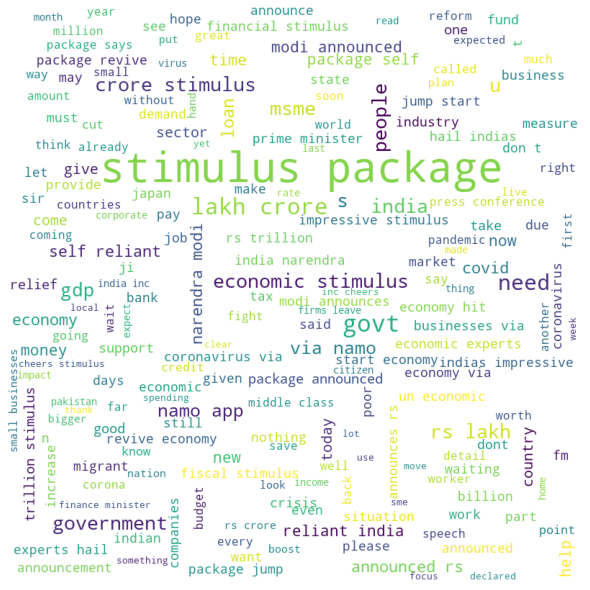

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()